In [1]:
%matplotlib inline

import os
from io import BytesIO
from csv import writer 
from time import process_time
from random import randint
from PIL import Image
from os import path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import (WordCloud, get_single_color_func)

import nltk
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer as lm
from nltk import Text
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize as sentoken
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")

In [2]:
#리뷰 불러오기
path = 'C:/Users/taehee/Documents/GitHub/tripReviewAnalysisSystem/크롤러-전처리/원시자료/'
deoksugung = pd.read_csv(path+'Deoksugung.csv', engine='python', index_col = 0, encoding = 'utf-8')

deoksugung.head()

,star_point,title,text,Date of experience
0,4.0,"Small City Palace, Great for Visit if one is s...",A small palace compared to that of Gyeongbukgu...,November 2019
1,5.0,My favorite Palace,This is probably one of my most favorite Palac...,January 2020
2,5.0,Love of Beauty is Taste. The Creation of Beaut...,There is a common believe that most South Kore...,January 2020
3,5.0,Deoksugung is a unique palace,I visited 2 palaces (Deoksugung & Gyeongbokgun...,December 2019
4,5.0,Plan to Visit here and the other Historical Pl...,Why pay for tour guides when you can hop on an...,January 2020


In [3]:
# 별점에 따라 쪼개기
deoksugung["star_point"].unique()

array([4., 5., 3., 2.])

In [4]:
deoksugung_4 = deoksugung[deoksugung["star_point"]==4]
deoksugung_4.head()

,star_point,title,text,Date of experience
0,4.0,"Small City Palace, Great for Visit if one is s...",A small palace compared to that of Gyeongbukgu...,November 2019
6,4.0,Changing of the guard,I've been here a few times over the years and ...,November 2019
8,4.0,Changing of the guards,This is a much smaller palace as compared to t...,April 2019
10,4.0,Lovely autumn colours,Deoksugung is right at City Hall Station. I we...,November 2019
11,4.0,Great palace to visit at night,Deoksugung is the only palace open at night an...,September 2019


In [7]:
stop_words = set(stopwords.words('english')) 
stop_words|set(['.', ',', 'the', "'s"])

{"'s",
 ',',
 '.',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 

In [47]:
def attraction_12345(attraction):
    result= pd.DataFrame(columns=['lower_text_n','Text_n','token_n'])
    print(attraction.head())
    for num in range(1,5+1):
        attraction_n = attraction[]
        
        #for문 없이 합치기
        ##다 소문자로 만들자. 컴퓨터는 The와 the가 다른 걸 모른다...
        lower_text_n =''.join(attraction_n['text']).lower()
        '''
        for text in attraction_n['text']:
            attraction_n_text += (" " + text)
        '''
        token_n = retokenize.tokenize(lower_text_n)
        filtered_token_n = [token for token in token_n if (token not in stop_words)]
        
        Text_n = Text(filtered_token_n)
        result.loc[num] = [lower_text_n, Text_n, filtered_token_n]
        
    return result

SyntaxError: invalid syntax (<ipython-input-47-8463aeacf3c9>, line 5)

그리고 동사나 여러 친구들도 원형으로 복원하기 위해서...
sentoken으로 문장으로 나눠주고
pos_tag로 각 단어의 품사를 찾고
lm을 써서 원형으로 복원한다

In [9]:
deoksugung_12345 = attraction_12345(deoksugung)

In [10]:
def get_wordnet_pos(tag):
    """Map POS tag to first character lemmatize() accepts"""
    
    tag_dict = {'ADJ': "J",
                'NOUN':"N",
                'VERB':"V",
                'ADV':"R"}

    return tag_dict.get(tag)

In [11]:
def root_text_12345(attraction_12345):
    not_change = ['ADV','NOUN','ADP','CONJ','DET','NUM', 'PRT','X']    
    result_12345 = []
    for (index, lower_text_n, Text_n, token_n)in attraction_12345.itertuples():

        sentences = sentoken(lower_text_n)
    
        tagged_tokens = []
        
        for sentence in sentences:
            new_tokens = retokenize.tokenize(sentence)
            new_tagged_tokens = pos_tag(new_tokens, tagset='universal')
            tagged_tokens.extend(new_tagged_tokens)

        result_n = []
        for (token, tag) in filtered_tokens:
            if tag not in not_change:
                try:
                    root = lm.lemmatize(lm, word = token, pos = get_wordnet_pos(tag))
                except KeyError:
                    root = token
                result_n.append(root)
            else:
                result_n.append(token)

        result_12345.append(Text(filtered_tokens))
    return result_12345

In [12]:
deoksugung_text_5 = Text(retokenize.tokenize(deoksugung_12345.loc[5 -2][0]))
#단어가 쓰인 문맥을 보여준다
deoksugung_text_5.concordance("palaces")

Displaying 12 of 12 matches:
ung the least of seoul s five grand palaces that s because its myriad buildings
to be visited compared to the other palaces this one has little to offer as the
t much to see compared to the other palaces the changing of the guard ceremony 
ly all you needthere are many other palaces that are more with to visit i then 
ine 1 or 2 this was the last of the palaces i visited on the combination ticket
y if you have no time for the other palaces don t have to get the combination t
nt most of the seoul city gates and palaces the king decided to live here until
 and we were 7 and 8 as seoul royal palaces go this one is certainly not a must
amazing photosas with all the seoul palaces this place is majestic and peaceful
indows was worth a look if you like palaces and you can reserve your place in t
 competitor to the other of seoul s palaces it has very much of a park like lay
f i compare deoksugung to the other palaces deoksugung is quiet and peaceful bu


문맥을 보면 palaces는 덕수궁을 다른 궁궐과 비교할 때 많이 쓰는 모양이다. 이를 수학적으로 보여주는 함수도 있다.

In [13]:
#similar함수는 언어학적으로 주변 문맥을 탐색해서 비슷하게 쓰인 동의어를 찾아준다.
# palace의 동의어는 place 뿐이다.
context_5 = nltk.text.ContextIndex(deoksugung_12345.loc[5 -2][2])

In [14]:
context_5.similar_words("palace")

['palaces']

In [15]:
#반면에 경비병과 경비병들은 동의어로 나온다. 믿을만하다.
context_5.similar_words("guard")

['guards']

In [16]:
#빈도의 리스트도 필요하다.
fd_5 = deoksugung_12345.iloc[5 -1][1].vocab()
fd_5.most_common(20)

[('palace', 171),
 ('changing', 50),
 ('buildings', 44),
 ('city', 40),
 ('visit', 38),
 ('free', 38),
 ('ceremony', 38),
 ('guard', 37),
 ('seoul', 36),
 ('tour', 35),
 ('place', 34),
 ('one', 32),
 ('palaces', 32),
 ('korean', 31),
 ('deoksugung', 31),
 ('see', 31),
 ('guards', 31),
 ('around', 29),
 ('time', 28),
 ('hall', 27)]

In [17]:
fd2 = nltk.FreqDist()
fd2['taehee'] = 2
fd2['taehee'] += 1
fd2['taehee']

3

In [18]:
test_rabbit = [('taehee',3),('rabbit',2)]
test_rabbit.remove(('taehee',3))
test_rabbit

[('rabbit', 2)]

In [19]:
#동의어를 그룹지어 준다다
def find_synonym_groups(context, fd):
    result = []
    all_words = fd.most_common()
    all_dict = dict(all_words)
    for (word, times) in all_words:                
        try:
            synonyms = context.similar_words(word)
            new_word = [word]
            for synonym in synonyms:
                new_word.append(synonym)
                synonym_times = all_dict[synonym]
                try:
                    all_words.remove((synonym, synonym_times))
                except ValueError:
                    continue
                except KeyError:
                    continue
                    
            result.append(new_word)
            
        except TypeError:
            result.append(word)
        except KeyError:
            continue
            
    return result

In [20]:
synonym_groups_5 = find_synonym_groups(context_5, fd_5)

In [21]:
synonym_groups_5[:3]

[['palace', 'palaces'], ['changing', 'quite', 'end'], ['buildings']]

In [22]:
# 아래 두 함수는 저도 복붙해온 것이니 이해하려 하지 마십시오오

class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

class GroupedColorFunc(object):

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func
        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [23]:
def random_color_to_groups(groups):
    result = {}
    for n, group in enumerate(groups):
        
        red_value = randint(100,255)
        green_value = randint(0,255 - int(red_value/2))
        blue_value = randint(0,255 - int((red_value+green_value)/2))
    
        rgb = [red_value,green_value,blue_value]
        rgb_color = "#"
        for color in rgb:
            if color < 16:
                rgb_color += "0"+hex(color)[-1]
            else:
                rgb_color += hex(color)[-2:]
        result[rgb_color] = group
    return result

In [24]:
mask_palace = np.array(Image.open("C:/Users/taehee/Pictures/palace3.png"))

In [25]:
wc_mask = WordCloud(background_color="white", max_words=500, mask = mask_palace, contour_width=2, contour_color='#ff9933', width=500, height=500)
wc = WordCloud(background_color="white", max_words=500, contour_width=2, contour_color='#ff9933', width=500, height=500)

default_color = 'grey'
wc.generate_from_frequencies(fd_5)
grouped_color_func = GroupedColorFunc(random_color_to_groups(synonym_groups_5), default_color)
wc.recolor(color_func=grouped_color_func)

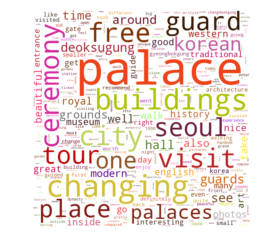

In [26]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
def word_avgstar(data_12345):
    '''
    입력 : 데이터프레임 of 텍스트
    출력 : 데이터 프레임 of 각 단어의 별점별 출현 빈도, 총 출현 빈도, 평균 별점
    '''
    
    result = pd.DataFrame([text_n.vocab() for text_n in data_12345.Text_n]).T
    star_12345 = result * range(1,6)

    result['total_freq'] = result.sum(axis=1)
    result['avg_star'] = star_12345.sum(axis=1) / result['total_freq']

    return result.sort_values(by=['total_freq'], axis=0, ascending=False)
    
    # for 구 버전 함수
    '''
    total_star = {}
    total_freq = {}
    
    for n, root_n in enumerate(root_12345):
        freq_n = root_n.vocab()
        freq_n_words = freq_n.most_common()
        
        for (word, freq) in freq_n_words:
                total_star[word] += n * freq
                total_freq[word] += freq
    
    result ={}
    
    for word in total_freq.keys():
        result[word] = float(total_star[word]) / float(total_freq[word])
    '''

In [28]:
def get_rgb(avg_star):
        
    green_value = int(215 * (avg_star / 5))

    if green_value <16:
        green_hex = "0"+ hex(green_value)[-1]
    else:
        green_hex = hex(green_value)[-2:]
    
    return "#ff" + green_hex + "00"

def star_to_color(freq_data):
    
    result = {}    
    for row in freq_data.loc[:][:500].itertuples():
        
        word = row[0]
        rgb_color = get_rgb(row.avg_star)
        
        if rgb_color not in result:
            result[rgb_color] = [word]
        else:
            result[rgb_color].append(word)
    return result   

In [48]:
def word_cloud_test(data):
    '''
    입력 리뷰 데이터 프레임을 넣으면
    출력 각 단어별로 긍정 부정 가중치가 매겨진 워드클라우드가
    '''    
    
    stime = process_time()
    
    #별점별로 나누기
    #별점별로 합치고 소문자로 
    data_12345 = attraction_12345(data)
    
    #단어별 평균 별점 계산
    #     total_star = pd.DataFrame(columns = ['total_star', 'total_freq'])
    
    data_12345.head()
        
    freq_data = word_avgstar(data_12345)
    total_freq = freq_data['total_freq']
    
    #단어별 평균 별점과 총 빈도수를 반영해, 워드클라우드 생성
    wc = WordCloud(background_color="white", max_words=200, contour_width=2, contour_color='#ff9933', width=500, height=500)
    default_color = 'grey'
    wc.generate_from_frequencies(total_freq)
    
    grouped_color_func = GroupedColorFunc(star_to_color(freq_data), default_color)
    wc.recolor(color_func=grouped_color_func)
    
    print('워드 클라우드 생성 완료: 소요시간 [%f]초' %(process_time()-stime))

    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    return wc

워드 클라우드 생성 완료: 소요시간 [1.109375]초


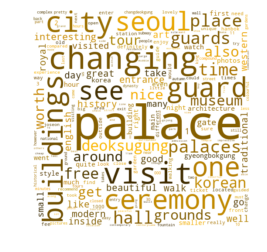

In [32]:
word_cloud_test(deoksugung)

In [33]:
def load_attraction_csv(github_path, file_list ,size):
    '''
    입력 : 깃허브 주소, 파일 리스트, 크기
    출력 : 각 여행지 별 리뷰들이 담긴 데이터 프레임의 딕셔너리
    '''
    
    result = {file_list[0] : pd.read_csv(github_path + '크롤러-전처리/원시자료/' + file_list[0], encoding = 'utf-8', engine='python', index_col = 0)}
    stime=process_time()
    print('데이터 로딩 start')

    for file_path in file_list[:size]:
        new_data = pd.read_csv(github_path + '크롤러-전처리/원시자료/' + file_path, encoding = 'utf-8', engine='python', index_col = 0)
        result[file_path] = new_data
    
    print('데이터 로딩 종료: 소요시간 [%f]초' %(process_time()-stime))
        
    return result

In [65]:
github_path = 'C:/Users/taehee/Documents/GitHub/tripReviewAnalysisSystem/'
raw_file_list = os.listdir(github_path + '크롤러-전처리/원시자료/')

file_list = [file_name for file_name in raw_file_list if file_name[-4:] == '.csv']

print ("file_list: {}".format(file_list[:10])+str(len(file_list)))

file_list: ['63 City.csv', 'Alive Museum Insadong.csv', 'Amore Pacific Museum of Art.csv', 'An Jung-geun Memorial Hall.csv', 'Ansan Jarak-gil.csv', 'apm Place.csv', 'Arario Museum in Space.csv', "Baek In-je's House.csv", 'Banpodaegyo Bridge.csv', 'Bongeunsa Temple.csv']179


In [68]:
def update_wordcloud(github_path, file_list):
    
    data_dict = load_attraction_csv(github_path, file_list ,180)
    
    for (name, data) in data_dict.items():       
        if len(data) > 10:
            wc = word_cloud_test(data)

            #단어 별로 별점 빈도를 

            # the path to save worldcloud
            img_path = github_path + '크롤러-전처리/원시자료/' + name + '.jpg'

            wc.to_file(img_path)
        else:
            continue

In [ ]:
update_wordcloud(github_path, file_list)